## Train Basic Neural Network

a fun exercise to see how well you understand my AI Simplified Playlist:
<br>
https://youtube.com/playlist?list=PLqXS1b2lRpYTpUIEu3oxfhhTuBXmMPppA
<br>
<br>
The entire code below is explained step by step, command by command, in this tutorial of mine:
<br>
https://youtu.be/xpPX3fBM9dU
<br>
<br>
by: Mariya Sha

### STEP 1: Generate Data

In [3]:
import numpy as np
import pandas as pd

rg = np.random.default_rng()

def generate_data(n_features, n_values):
    features = rg.random((n_features, n_values))
    weights = rg.random((1, n_values))[0]
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights

data, weights = generate_data(4,3)
print(data)

         x0        x1        x2  targets
0  0.948433  0.730209  0.299710        0
1  0.596069  0.703006  0.177977        1
2  0.807128  0.904317  0.770242        0
3  0.397788  0.977259  0.467756        0


In [5]:
weights

array([0.17326481, 0.06933956, 0.75615047])

### STEP 2: Train Model

In [4]:
bias = 0.5
l_rate = 0.1
epochs = 50
epoch_loss = []

def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)

train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.4608076045574645
**************************
epoch 1
0.3807668136565304
**************************
epoch 2
0.32958802279570854
**************************
epoch 3
0.29778713528429324
**************************
epoch 4
0.278043189576636
**************************
epoch 5
0.2655889751518734
**************************
epoch 6
0.25753841024802454
**************************
epoch 7
0.2521811526531437
**************************
epoch 8
0.24849971711515279
**************************
epoch 9
0.2458797957016044
**************************
epoch 10
0.2439435895659274
**************************
epoch 11
0.24245437028260755
**************************
epoch 12
0.24126120677727142
**************************
epoch 13
0.24026637482097937
**************************
epoch 14
0.23940575221090754
**************************
epoch 15
0.23863678841016284
**************************
epoch 16
0.23793098259814502
**************************
epoch 17
0.23726909950242353
**********

inferencing

### STEP 3: Plot/Visuallize data

<Axes: >

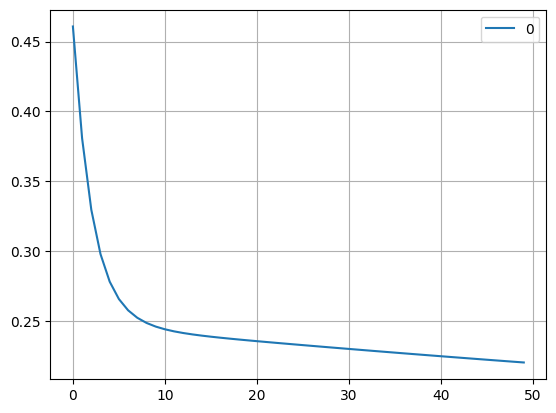

In [6]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True)
df_plot

In [7]:
import numpy as np

def predict(feature, weights, bias):
    w_sum = np.dot(feature, weights) + bias
    prediction = sigmoid(w_sum)
    return prediction

# Replace the following with your trained weights and bias
trained_weights = np.array([0.2, 0.3, 0.4])
trained_bias = 0.5

# Example new input for inference
new_feature = np.array([0.1, 0.2, 0.3])

# Perform inference
prediction = predict(new_feature, trained_weights, trained_bias)

# Interpret the result
if prediction > 0.5:
    prediction_label = "Attack"
else:
    prediction_label = "Normal"

print("Prediction:", prediction_label)
print("Prediction Score:", prediction)


Prediction: Attack
Prediction Score: 0.6681877721681662
